# Load data


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

In [2]:
# Load all dataframes
sim1_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleA.csv")
sim2_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleB.csv")
sim3_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleC.csv")
sim4_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleD.csv")
sim5_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleE.csv")
sim6_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleF.csv")

# Add column with from witch cycle
sim1_base["Cycle"] = "A"
sim2_base["Cycle"] = "B"
sim3_base["Cycle"] = "C"
sim4_base["Cycle"] = "D"
sim5_base["Cycle"] = "E"
sim6_base["Cycle"] = "F"

# Prepare for concatenation
sim1_base["Cycle_BatchID"] = sim1_base["Cycle"] + "_" + sim1_base["BatchID"].apply(str)
sim3_base["Cycle_BatchID"] = sim2_base["Cycle"] + "_" + sim2_base["BatchID"].apply(str)
sim4_base["Cycle_BatchID"] = sim3_base["Cycle"] + "_" + sim3_base["BatchID"].apply(str)
sim2_base["Cycle_BatchID"] = sim4_base["Cycle"] + "_" + sim4_base["BatchID"].apply(str)
sim5_base["Cycle_BatchID"] = sim5_base["Cycle"] + "_" + sim5_base["BatchID"].apply(str)
sim6_base["Cycle_BatchID"] = sim6_base["Cycle"] + "_" + sim6_base["BatchID"].apply(str)

sim_base = pd.concat([
    sim1_base,
    sim2_base,
    sim3_base,
    sim4_base,
    sim5_base,
    sim6_base
])

In [3]:
# sim1 = sim1_base.copy()
# sim2 = sim2_base.copy()
# sim3 = sim3_base.copy()
# sim4 = sim4_base.copy()
# sim5 = sim5_base.copy()
# sim6 = sim6_base.copy()

# Investigation of data


## Basic statistics

In [15]:
sim_base.columns

Index(['Time_out', 'BatchID', 'CleaningID', 'EventFrameID_Reference',
       'EventFrameLabel_Current', 'F1_Cooling_Water_PV', 'F2_Steam_PV',
       'H1_WithSensorNoise_PV', 'H1_WithoutSensorNoise_PV', 'Hatch_Digital',
       'L1_WithSensorNoise_PV', 'L1_WithoutSensorNoise_PV', 'N1_PV',
       'Y1_Digital', 'Y2_Digital', 'Y3_Digital', 'Y4_Digital', 'Y5_Digital',
       'Y6_Digital', 'Cycle', 'Cycle_BatchID'],
      dtype='object')

In [19]:
sim_base.Cycle_BatchID.unique()

array(['A_1', 'A_0', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6', 'A_7', 'A_8',
       'A_9', 'A_10', 'A_11', 'A_12', 'A_13', 'A_14', 'A_15', 'A_16',
       'A_17', 'A_18', 'A_19', 'A_20', 'A_21', 'A_22', 'A_23', 'A_24',
       'A_25', 'A_26', 'A_27', 'A_28', 'A_29', 'A_30', 'A_31', 'A_32',
       'A_33', 'A_34', 'A_35', 'A_36', 'A_37', 'A_38', 'A_39', 'A_40',
       'A_41', 'A_42', 'A_43', 'A_44', 'A_45', 'A_46', 'A_47', 'A_48',
       'A_49', 'A_50', 'A_51', 'A_52', 'A_53', 'A_54', 'A_55', 'A_56',
       'A_57', 'A_58', 'A_59', 'A_60', 'A_61', 'A_62', 'A_63', 'A_64',
       'A_65', 'A_66', 'D_1', 'D_2', 'D_3', 'D_4', 'D_5', 'D_6', 'D_7',
       'D_8', 'D_9', 'D_0', 'D_10', 'D_11', 'D_12', 'D_13', 'D_14',
       'D_15', 'D_16', 'D_17', 'D_18', 'D_19', 'D_20', 'D_21', 'D_22',
       'D_23', 'D_24', 'D_25', 'D_26', 'D_27', 'D_28', 'D_29', 'D_30',
       'D_31', 'D_32', 'D_33', 'D_34', 'D_35', 'D_36', 'D_37', 'D_38',
       'D_39', 'D_40', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46',
       'D_

In [147]:
for c in sim_base.Cycle.unique():
    print(f"Cycle {c}")
    print(f"  number of batches: {sim_base[(sim_base.Cycle == c) & (sim_base.BatchID != 0)].BatchID.unique().__len__()}")
    batch_duration = sim_base[(sim_base.Cycle == c) & (sim_base.BatchID != 0)].groupby(["BatchID"]).Time_out.apply(np.array).apply(lambda t: t[-1] - t[0])
    print(f"  time length mean: {batch_duration.mean()}")
    print(f"  time length var: {batch_duration.var()}")
    

Cycle A
  number of batches: 66
  time length mean: 14.776303030303035
  time length var: 3.641225291375274
Cycle B
  number of batches: 64
  time length mean: 15.644421874999985
  time length var: 3.9153680255456424
Cycle C
  number of batches: 61
  time length mean: 17.714000000000006
  time length var: 2.33010319999999
Cycle D
  number of batches: 60
  time length mean: 18.068666666666665
  time length var: 6.921814836158215
Cycle E
  number of batches: 60
  time length mean: 18.088049999999992
  time length var: 9.612549336440695
Cycle F
  number of batches: 63
  time length mean: 17.22652380952381
  time length var: 7.766125285714257


## Time steps

In [12]:
t_deltas = sim_base.groupby(["Cycle"]).Time_out.apply(np.array).apply(lambda t : t[1:] - t[:-1])
print(t_deltas.apply(np.min))
print(t_deltas.apply(np.max))
print(t_deltas.apply(lambda t: np.sum(t < delta_t - eps_t)))

Cycle
A    0.001
B    0.001
C    0.001
D    0.001
E    0.001
F    0.001
Name: Time_out, dtype: float64
Cycle
A    0.001
B    0.001
C    0.001
D    0.001
E    0.001
F    0.001
Name: Time_out, dtype: float64
Cycle
A    0
B    0
C    0
D    0
E    0
F    0
Name: Time_out, dtype: int32


In [13]:
delta_t = 0.001
eps_t = delta_t * 10 ** -4

## Investigation of BatchID 0


In [3]:
np.where(sim_base.BatchID == 0)[0]

array([  15741,   15742,   15743, ..., 6404413, 6404414, 6404415],
      dtype=int64)

In [4]:
# If BatchID == 0, then in state 11
print("BatchID == 0, EventFrameID_Reference" ,sim_base[sim_base.BatchID == 0].EventFrameID_Reference.unique())

# If BatchID != 0, then not in state 11
print("BatchID != 0, EventFrameID_Reference" ,sim_base[sim_base.BatchID != 0].EventFrameID_Reference.unique())

# Dermed: BatchID = 0  <=>  Er i rensestadie

BatchID == 0, EventFrameID_Reference [ 11.1  11.2  11.3  11.4  11.5 -11. ]
BatchID != 0, EventFrameID_Reference [  1.    2.    3.1   3.2   4.1   4.2   4.3   5.    6.    7.   -7.    8.
  -8.    9.   10.   -1.   -3.   -5.   -4.   -6.  -10.   -9.   -2.   -4.1
  -4.2  -4.3]


In [5]:
sim_base[
    (sim_base.BatchID == 0) & 
    (sim_base.Cycle == "A")
    ].CleaningID.unique()

# [Cleaning ID] svarer nok til hvilken [Batch ID] som rense processen kommer efter. Dog er nogle af cleaning ID == 0 (stemmer også overens med tiderne stiger i nedenstående plot)

# sim_base[
#     (sim_base.Cycle == "A")
#     ].BatchID.unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

In [9]:
sim_base[
    (sim_base.BatchID == 0) & 
    (sim_base.CleaningID == 0)
    ].EventFrameID_Reference.unique()

# Alle dem hvor cleaning ID == 0 (og en rensning) svarer til [EventFrameID_Reference] = 11.5, som ifølge artikel svarer til at "flush tank", altså skille sig af med spildevand

array([11.5])

In [7]:
# Tidsintervaller hvor BatchID er 0 og cleaningID ikke er 0 (cleaningID ikke nul, så kan grupperes for at finde start og slut nemt)
c = "A"
x = sim_base[
        (sim_base.Cycle == c) & 
        (sim_base.BatchID == 0) & 
        (sim_base.CleaningID != 0)
        ]

l = x.groupby(["CleaningID"]).Time_out.apply(np.array).apply(lambda t : [t[0] ,t[-1]]).values
for s in range(0, l.shape[0]-1, 2):
    print(l[s])

[15.741, 17.275]
[48.739, 50.157]
[85.049, 86.565]
[117.047, 118.507]
[150.038, 152.792]
[185.303, 187.929]
[221.105, 222.523]
[255.491, 256.854]
[289.47, 292.537]
[325.658, 328.019]
[356.892, 357.984]
[390.332, 391.733]
[423.439, 426.114]
[458.57, 459.94]
[492.021, 494.521]
[522.994, 524.03]
[556.599, 558.082]
[588.856, 590.313]
[623.691, 625.199]
[658.553, 661.423]
[692.555, 694.179]
[724.483, 725.977]
[760.661, 762.156]
[795.542, 797.585]
[828.538, 829.895]
[859.933, 861.102]
[894.247, 895.762]
[927.852, 930.887]
[965.668, 967.133]
[999.514, 1001.681]
[1030.175, 1031.243]
[1062.603, 1064.966]


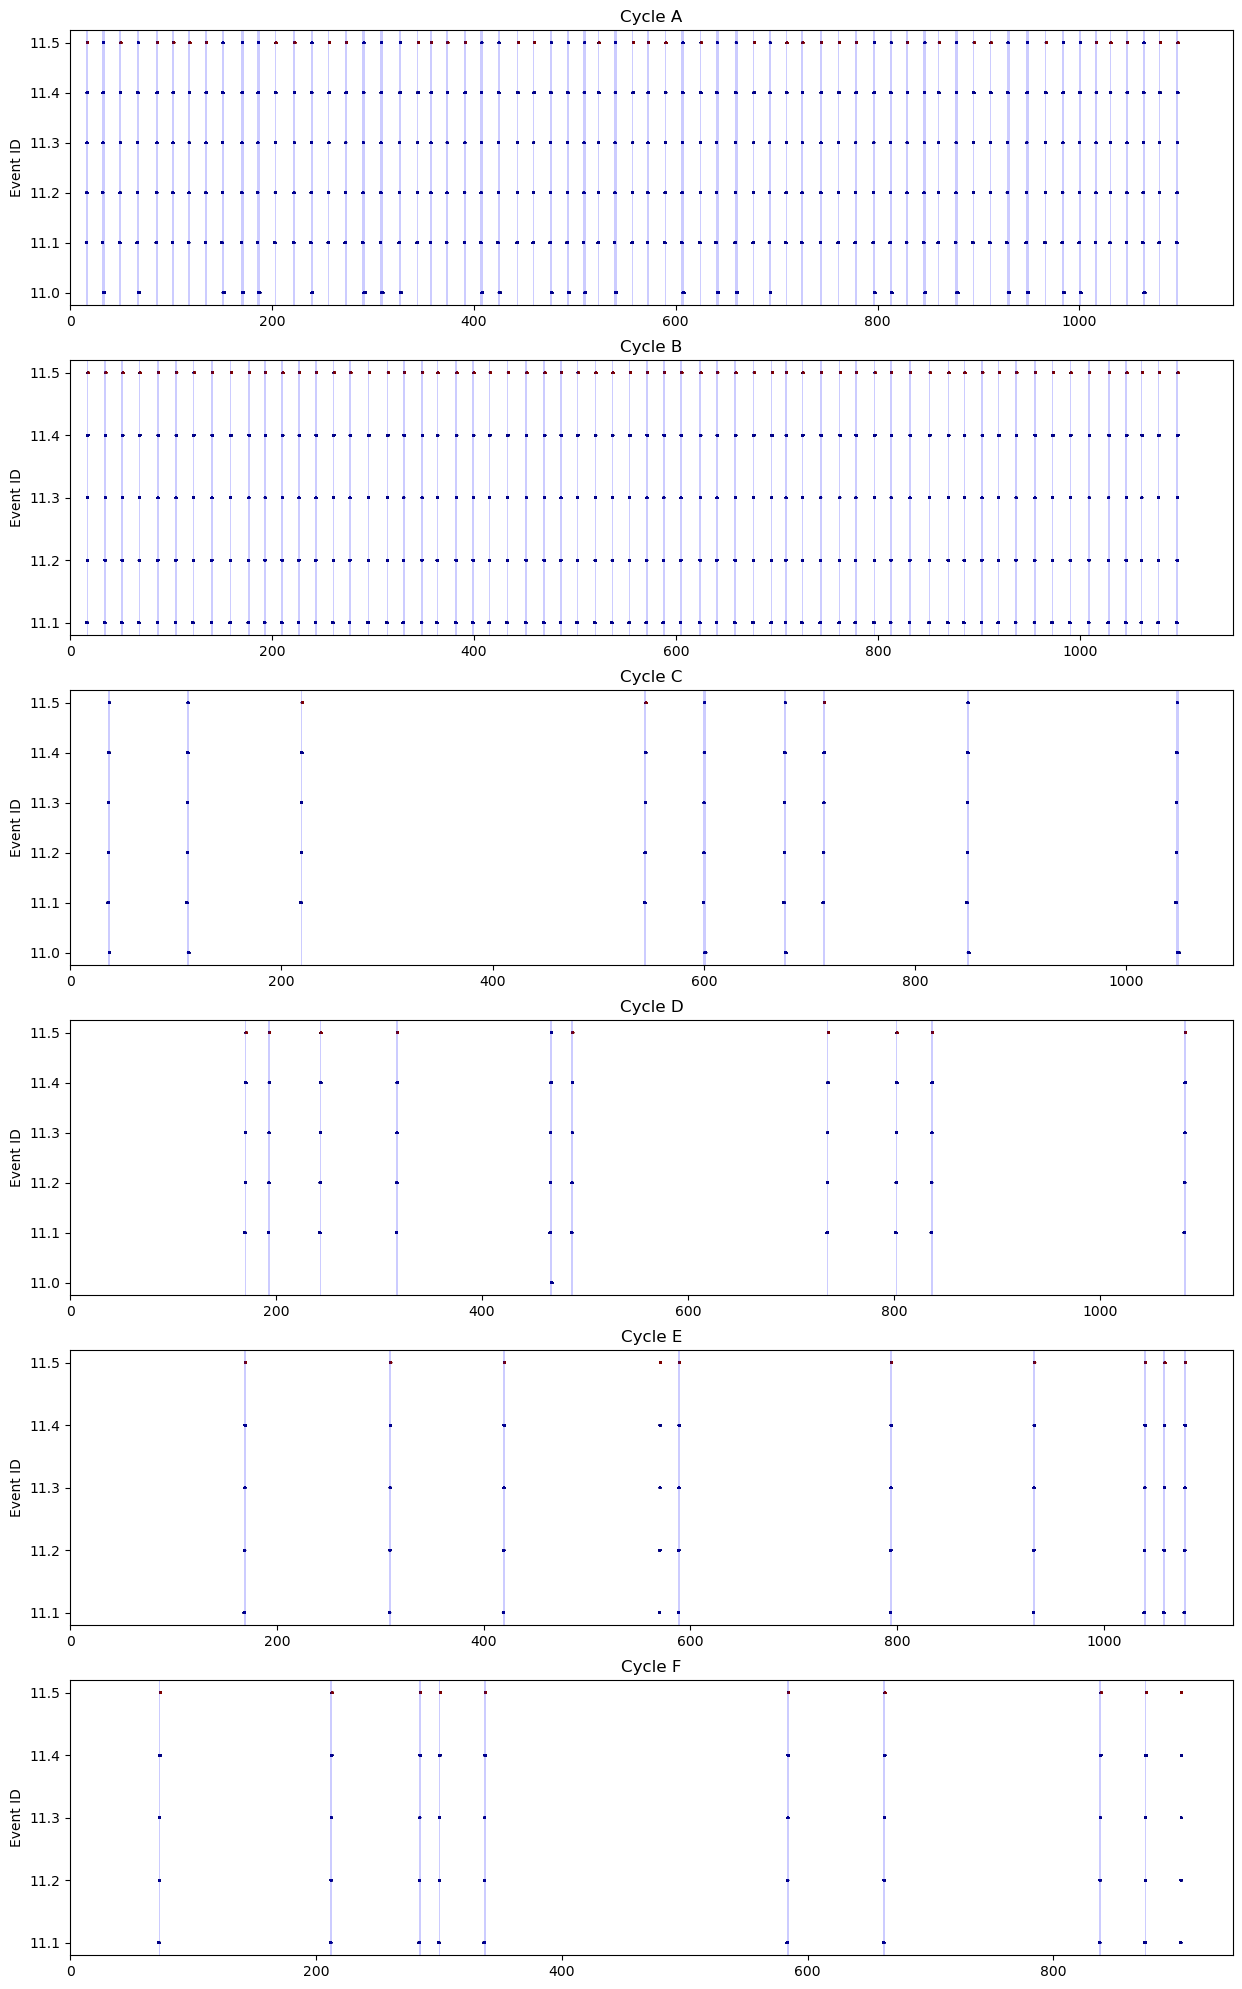

In [216]:
fig, axs = plt.subplots(6, 1, figsize=(15, 25))
for idx, c in enumerate(sim_base.Cycle.unique()):
    x = sim_base[
        (sim_base.Cycle == c) & 
        (sim_base.BatchID == 0)
        # (sim_base.CleaningID != 0)
        ]
    
    axs.flat[idx].scatter(x.Time_out, x.EventFrameID_Reference.abs(), c = x.CleaningID == 0, s = 0.5, cmap = "jet")
    axs.flat[idx].title.set_text(f"Cycle {c}")


    x2 = sim_base[
        (sim_base.Cycle == c) & 
        (sim_base.BatchID == 0) &
        (sim_base.CleaningID != 0)
        ]
    l = x2.groupby(["CleaningID"]).Time_out.apply(np.array).apply(lambda t : [t[0], t[-1]]).values
    # l = np.concatenate([ np.array([x2.Time_out.min()]), l ])
    
    for s in l:
        axs.flat[idx].axvspan(s[0], s[1], facecolor='b', alpha=0.2)

    axs.flat[idx].set_yticks(x.EventFrameID_Reference.abs().unique())
    axs.flat[idx].set_ylabel("Event ID")
    axs.flat[idx].set_xlim(left=0)

# Yellow is if cleaning ID == 0.  =>  Der er også flushing hvis 

[15.741, 17.275]


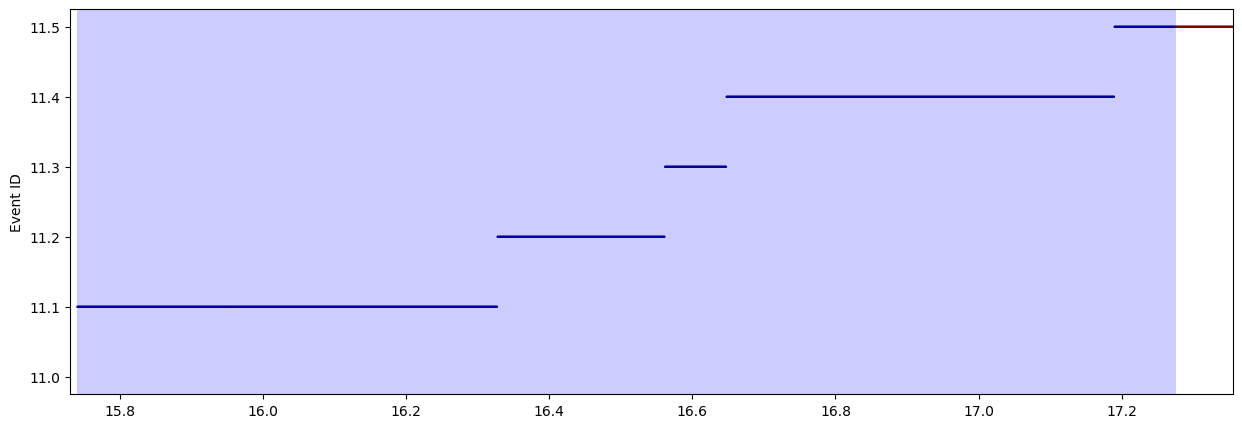

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
for idx, c in enumerate(["A"]):
    x = sim_base[
        (sim_base.Cycle == c) & 
        (sim_base.BatchID == 0)
        # (sim_base.CleaningID != 0)
        ]
    
    axs.scatter(x.Time_out, x.EventFrameID_Reference.abs(), c = x.CleaningID == 0, s = 0.5, cmap = "jet")
    # axs.title.set_text(f"Cycle {c}")


    x2 = sim_base[
        (sim_base.Cycle == c) & 
        (sim_base.BatchID == 0) &
        (sim_base.CleaningID != 0)
        ]
    l = x2.groupby(["CleaningID"]).Time_out.apply(np.array).apply(lambda t : [t[0], t[-1]]).values
    # l = np.concatenate([ np.array([x2.Time_out.min()]), l ])
    
    for s in l:
        axs.axvspan(s[0], s[1], facecolor='b', alpha=0.2)

    axs.set_yticks(x.EventFrameID_Reference.abs().unique())
    axs.set_ylabel("Event ID")
    axs.set_xlim([l[0][0] - 10*delta_t,l[0][1] + 80*delta_t])
    print(l[0])
# Yellow is if cleaning ID == 0.  =>  Der er også flushing hvis 

In [14]:
# Duration of cleaning operations (not relying on the Cleaning ID i.e. also with the red points from above)
cleansing_obs = sim_base[sim_base.BatchID == 0].groupby(
    ["Cycle"]
    ).Time_out.apply(np.array).apply(
        lambda t: [ t, np.concatenate( [np.array([-1]), np.where(t[1:] - t[:-1] > delta_t + eps_t)[0] ] ) ]
        ).apply(
           lambda t: [t[0][t[1][idx]] - t[0][t[1][idx-1] + 1] for idx,_ in enumerate(t[1])]
        )

cleansing_obs_intervals = sim_base[sim_base.BatchID == 0].groupby(
    ["Cycle"]
    ).Time_out.apply(np.array).apply(
        lambda t: [ t, np.concatenate( [np.array([-1]), np.where(t[1:] - t[:-1] > delta_t + eps_t)[0] ] ) ]
        ).apply(
           lambda t: [ [t[0][t[1][idx]] , t[0][t[1][idx-1] + 1]] for idx,_ in enumerate(t[1])]
        )

print("min\n",cleansing_obs.apply(np.min),"\n")
print("max\n",cleansing_obs.apply(np.max),"\n")
print("num obs\n",cleansing_obs.apply(lambda t : t.__len__()),"\n")
print("mean\n",cleansing_obs.apply(np.mean),"\n")
print("var\n",cleansing_obs.apply(np.var),"\n")

min
 Cycle
A    1.113
B    1.324
C    1.544
D    1.474
E    0.827
F    0.748
Name: Time_out, dtype: float64 

max
 Cycle
A    3.067
B    1.751
C    3.306
D    2.009
E    1.584
F    1.610
Name: Time_out, dtype: float64 

num obs
 Cycle
A    65
B    63
C     9
D    10
E    10
F    10
Name: Time_out, dtype: int64 

mean
 Cycle
A    1.917446
B    1.565571
C    2.153000
D    1.581100
E    1.464800
F    1.465700
Name: Time_out, dtype: float64 

var
 Cycle
A    0.268840
B    0.008825
C    0.277191
D    0.021241
E    0.046171
F    0.059480
Name: Time_out, dtype: float64 



In [15]:
cleansing_obs_intervals

Cycle
A    [[1097.894, 1096.146], [17.363, 15.741], [33.9...
B    [[1097.526, 1095.799], [17.751, 16.234], [35.3...
C    [[1050.053, 1046.747], [37.446, 35.541], [112....
D    [[1083.428, 1081.842], [170.91, 169.376], [193...
E    [[1079.232, 1077.687], [169.65, 168.15], [310....
F    [[904.41, 903.662], [73.431, 71.828], [213.174...
Name: Time_out, dtype: object

In [235]:
plt.rcParams.update({'axes.titlesize': 20})
params = {'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

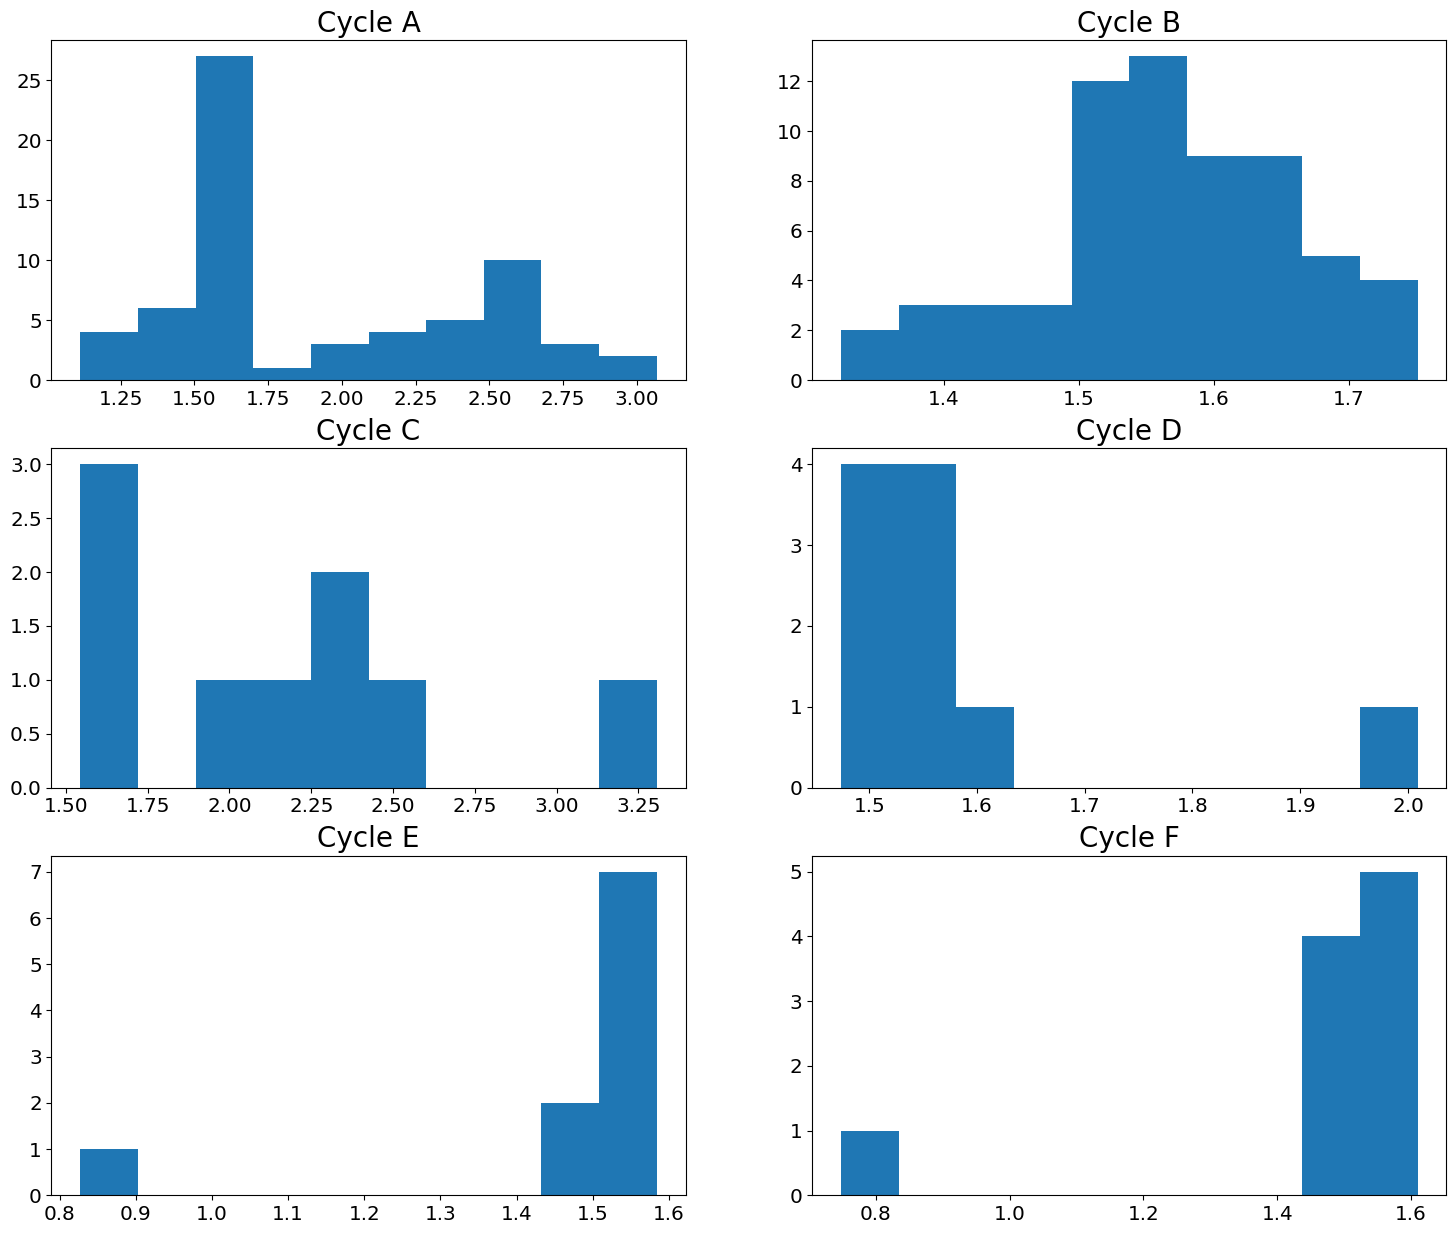

In [242]:
fig, axs = plt.subplots(3, 2, figsize=(18, 15))


for idx,c in enumerate(cleansing_obs.index):
    
    axs.flat[idx].hist(cleansing_obs[c])
    axs.flat[idx].title.set_text(f"Cycle {c}")

(array([ 2.,  4., 32., 95.,  2.,  8., 12.,  7.,  3.,  2.]),
 array([0.748 , 1.0038, 1.2596, 1.5154, 1.7712, 2.027 , 2.2828, 2.5386,
        2.7944, 3.0502, 3.306 ]),
 <BarContainer object of 10 artists>)

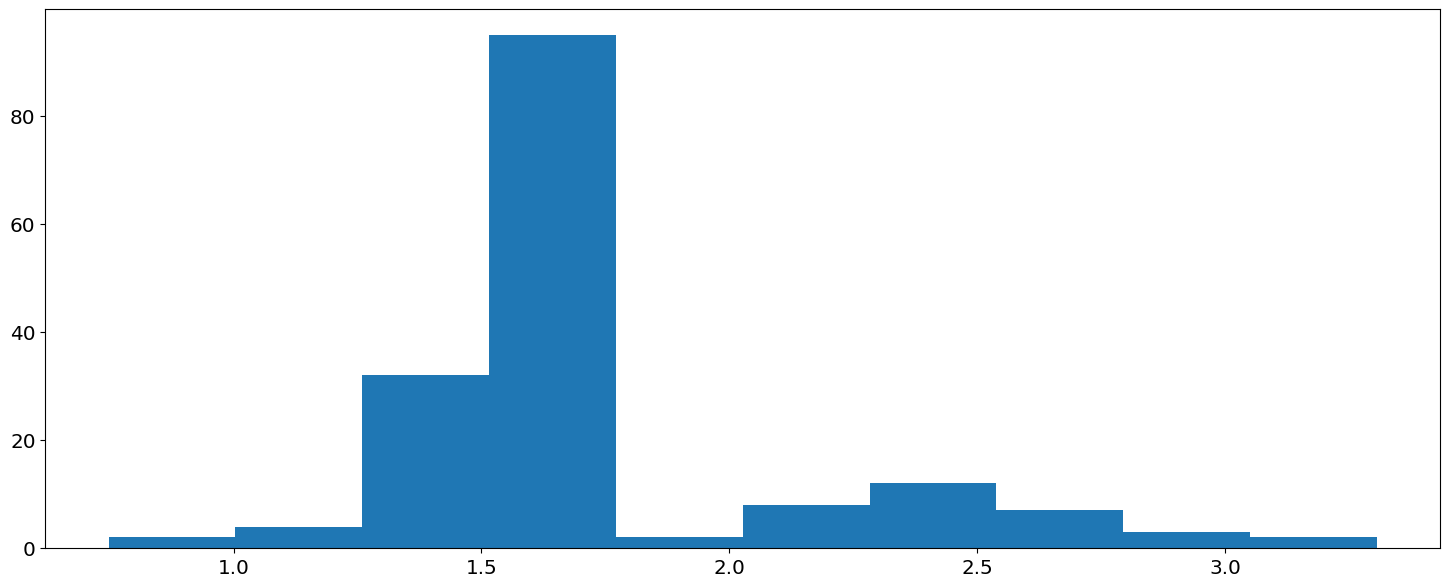

In [247]:
fig, axs = plt.subplots(1,1, figsize=(18, 7))

cleansing_obs_all = []
for idx,c in enumerate(cleansing_obs.index):
    cleansing_obs_all += cleansing_obs[c]

axs.hist(cleansing_obs_all)

In [30]:
# It is observed that cycles C through F don't have cleaning betweeen every batch. Thus, we want to measure how often this occurs

# How often is there a cleaning
sim_base[ (sim_base.BatchID == 0) & (sim_base.Cycle.apply( lambda x : x in ["C", "D", "E", "F"]) ) & (sim_base.CleaningID != 0) ].groupby("Cycle").CleaningID.apply(np.unique)

Cycle
C        [1, 2, 3, 4, 5, 6, 7, 8, 9]
D    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
E    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
F    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Name: CleaningID, dtype: object

In [33]:
10/62

0.16129032258064516

In [41]:
X.loc[0].EventFrameID_Reference

1.0

In [55]:
sim_base.EventFrameID_Reference.values

array([1., 1., 1., ..., 6., 6., 6.])


Cycle C
[[41.  9.]
 [ 9.  0.]]
SignificanceResult(statistic=0.0, pvalue=0.32930393649902756)

Cycle D
[[41.  8.]
 [ 7.  2.]]
SignificanceResult(statistic=1.4642857142857142, pvalue=0.645644228890511)

Cycle E
[[41.  7.]
 [ 7.  3.]]
SignificanceResult(statistic=2.510204081632653, pvalue=0.3531601003556947)

Cycle F
[[42.  9.]
 [ 9.  1.]]
SignificanceResult(statistic=0.5185185185185185, pvalue=1.0)


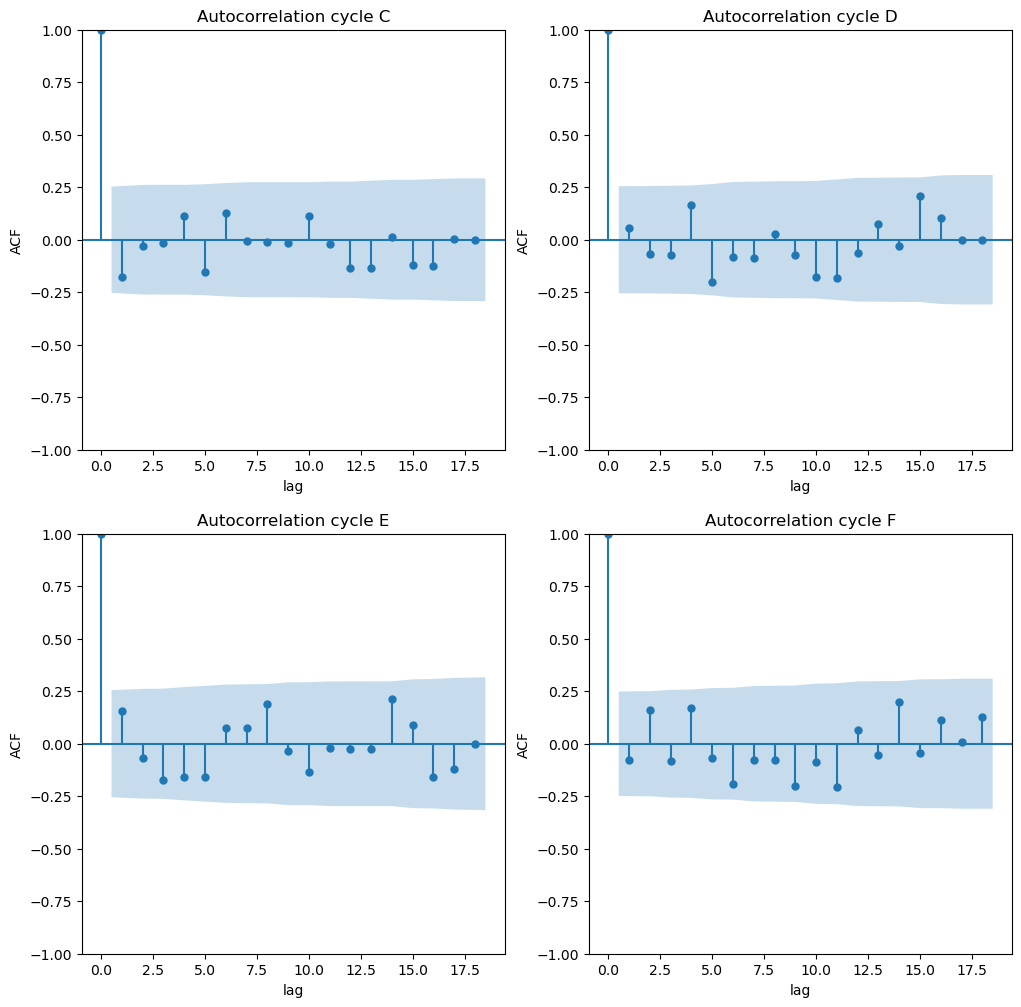

In [19]:
test = []

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for idx_, c in enumerate(["C","D","E","F"]):
    print(f"\nCycle {c}")
    X = sim_base[ (sim_base.Cycle == c) ];
    isOne = (np.abs(X.EventFrameID_Reference) == 1).values

    cycleStartIndices = np.where((~np.roll(isOne, 1) & isOne))[0]
    cycleEndIndices = np.where((np.roll(isOne, -1) & ~isOne))[0]

    # Throw away the last bool (always false), as never cleaning after last batch
    test = np.array([ (X.iloc[t_start:t_slut+1].BatchID == 0).any() for t_start, t_slut in zip(cycleStartIndices, cycleEndIndices)]
    )[:-1]

    # print(test)

    m = np.zeros((2,2))

    # print(cycleStartIndices)
    # print(cycleEndIndices)


    for idx, i in enumerate(test[:-1]):
        m[int(i), int(test[idx+1])] += 1

    print(m)
    # print(f"observed from {m[1,:].sum()}")
    print(scipy.stats.fisher_exact(m))

    plot_acf(test, ax = axs.flat[idx_])
    axs.flat[idx_].set_xlabel("lag")
    axs.flat[idx_].set_ylabel("ACF")
    axs.flat[idx_].set_title(f"Autocorrelation cycle {c}")
    # sm.graphics.tsa.plot_acf(test, ax = axs.flat[idx_])
    
    # plt.title(f"Autocorrelation cycle {c}")
    # plt.xlabel("lag")
    # plt.ylabel("ACF")
    

In [189]:
m

array([[41.,  9.],
       [ 9.,  0.]])

In [219]:
# How often is a cleaning done after a batch (for cycles C-F)
(9+10+10+10) / (60+59+59+62)

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False])

In [112]:
cycleStartIndices

array([      0,   17166,   37447,   54013,   72164,   91985,  112396,
        129407,  146592,  165134,  183350,  201103,  219833,  237799,
        255903,  274445,  292571,  310143,  327449,  343789,  363214,
        377408,  394374,  413298,  431530,  450237,  467978,  485647,
        504753,  523665,  545272,  562024,  579642,  601854,  619733,
        636540,  657547,  677846,  695355,  714401,  733036,  747733,
        766221,  781379,  797829,  814683,  830585,  851114,  867289,
        884915,  905090,  921251,  937922,  956961,  975509,  993470,
       1011187, 1028054, 1050054, 1071041, 1088033], dtype=int64)

In [111]:
X.iloc[cycleEndIndices]

,Time_out,BatchID,CleaningID,EventFrameID_Reference,EventFrameLabel_Current,F1_Cooling_Water_PV,F2_Steam_PV,H1_WithSensorNoise_PV,H1_WithoutSensorNoise_PV,Hatch_Digital,...,L1_WithoutSensorNoise_PV,N1_PV,Y1_Digital,Y2_Digital,Y3_Digital,Y4_Digital,Y5_Digital,Y6_Digital,Cycle,Cycle_BatchID
17165,17.165,1,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,1,0,C,B_0
37446,37.446,0,1,-11.0,CIP__Flush_Tank1,0.0,0.000000,3.62159,3.60325,0,...,4.58516,0.0,0,0,0,0,0,0,C,B_3
54012,54.012,3,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,0,0,C,B_4
72163,72.163,4,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,0,0,C,B_5
91984,91.984,5,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,0,0,C,B_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028053,1028.053,57,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,0,0,C,B_0
1050053,1050.053,0,9,-11.0,CIP__Flush_Tank1,0.0,0.000000,2.33013,1.56490,0,...,2.86761,0.0,0,0,0,0,0,0,C,B_61
1071040,1071.040,59,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,0,0,C,B_62
1088032,1088.032,60,0,10.0,Material_Transfer,0.0,0.000000,0.00000,0.00000,0,...,0.00000,0.0,0,0,0,0,0,0,C,B_63


In [86]:
X[isEndOfNewCycle]

NameError: name 'isEndOfNewCycle' is not defined

In [17]:
sim_base[ (sim_base.Cycle == "A") & (sim_base.Time_out > 17.275) & (sim_base.Time_out < 17.35) ].EventFrameID_Reference.unique()

array([11.5])

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

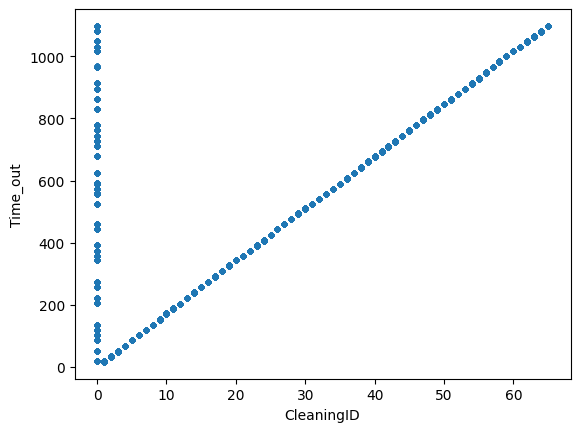

In [8]:
# BatchID == 0 Skal grupperes efter tider (ikke samme renseprocess/CIP -> CleaningID)
plt.plot(sim1[sim1.BatchID == 0].CleaningID,sim1[sim1.BatchID == 0].Time_out,'.')
plt.xlabel("CleaningID")
plt.ylabel("Time_out")
sim1[sim1.BatchID == 0].CleaningID.unique()

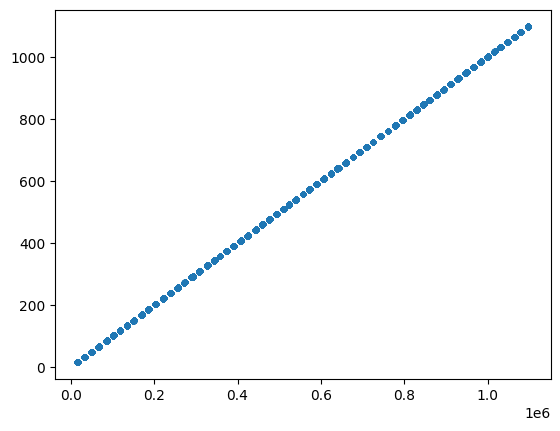

In [9]:
plt.plot(sim1[sim1.BatchID == 0].Time_out,'.')

Der er en cleaning imellem alle batches, ser det ud til


In [10]:
sim1[(sim1.BatchID == 0) & (sim1.CleaningID == 0) ].EventFrameID_Reference.unique()

array([11.5])

Det konkluderes at BatchID == 0 er ensbetydende med oprensning af tanken. Dette kan der også modelleres dybere -> korrelation med forhenværende cycle


# Production cycles


In [11]:
sim1_production = sim1[sim1.BatchID != 0].copy()
sim2_production = sim2[sim2.BatchID != 0].copy()
sim3_production = sim3[sim3.BatchID != 0].copy()
sim4_production = sim4[sim4.BatchID != 0].copy()
sim5_production = sim5[sim5.BatchID != 0].copy()
sim6_production = sim6[sim6.BatchID != 0].copy()

In [12]:
# Check that production only contains non-cleaning (check)
print(sim1_production.CleaningID.unique())
print(sim2_production.CleaningID.unique())
print(sim3_production.CleaningID.unique())
print(sim4_production.CleaningID.unique())
print(sim5_production.CleaningID.unique())
print(sim6_production.CleaningID.unique())

[0]
[0]
[0]
[0]
[0]
[0]


## Plots


In [13]:
sim1_eventID = sim1_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim1_timeout = sim1_production.groupby(['BatchID']).Time_out.apply(np.array)

sim2_eventID = sim2_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim2_timeout = sim2_production.groupby(['BatchID']).Time_out.apply(np.array)

sim3_eventID = sim3_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim3_timeout = sim3_production.groupby(['BatchID']).Time_out.apply(np.array)

sim4_eventID = sim4_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim4_timeout = sim4_production.groupby(['BatchID']).Time_out.apply(np.array)

sim5_eventID = sim5_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim5_timeout = sim5_production.groupby(['BatchID']).Time_out.apply(np.array)

sim6_eventID = sim6_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim6_timeout = sim6_production.groupby(['BatchID']).Time_out.apply(np.array)


# Concatenate all data
c_eventID = np.concatenate(
    [
        sim1_eventID,
        sim2_eventID,
        sim3_eventID,
        sim4_eventID,
        sim5_eventID,
        sim6_eventID
    ]
)

c_timeout = np.concatenate(
    [
        sim1_timeout,
        sim2_timeout,
        sim3_timeout,
        sim4_timeout,
        sim5_timeout,
        sim6_timeout
    ]
)

Text(0, 0.5, 'label')

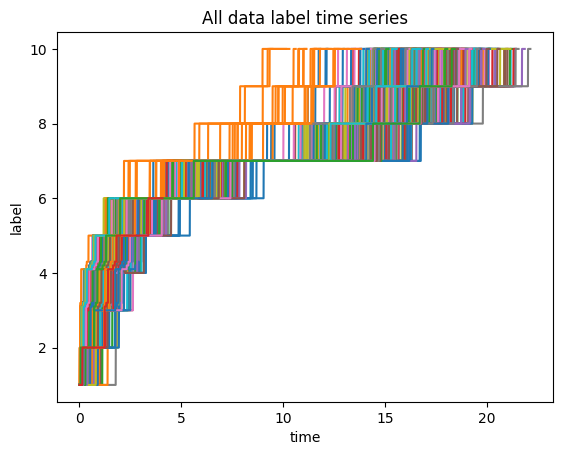

In [14]:
for t,e in zip(c_timeout, c_eventID):
    plt.plot( t - t[0] , np.abs(e))

plt.title("All data label time series")
plt.xlabel("time")
plt.ylabel("label")

### plots for a single simulation

In [15]:
sim1_prod_abs = sim1_production.copy()
sim1_prod_abs.EventFrameID_Reference = sim1_prod_abs.EventFrameID_Reference.apply(np.abs)
event_times1 = sim1_prod_abs.groupby(["EventFrameID_Reference", "BatchID" ]).Time_out.apply( np.array ).apply( lambda x : x[-1] - x[0])

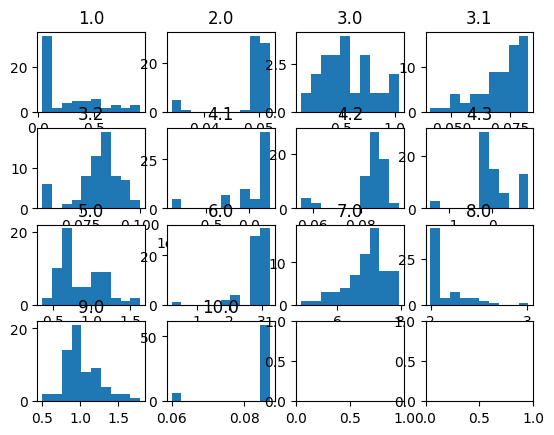

In [16]:
# make histograms
fig, axs = plt.subplots(4, 4)

frameIDList =  event_times1.index.get_level_values("EventFrameID_Reference").unique().to_list()
for idx, frameID in enumerate(frameIDList):
    axs.flat[idx].hist(event_times1[frameID])
    axs.flat[idx].title.set_text(f"{frameID}")

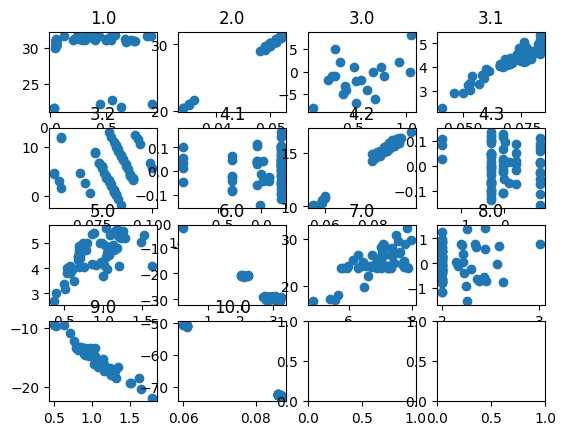

In [40]:
event_level1 = sim1_prod_abs.groupby(["EventFrameID_Reference","BatchID"]).L1_WithSensorNoise_PV.apply( np.array ).apply( lambda x : x[-1])
event_leveldiff1 = sim1_prod_abs.groupby(["EventFrameID_Reference","BatchID"]).L1_WithSensorNoise_PV.apply( np.array ).apply( lambda x : x[-1] - x[0])

fig, axs = plt.subplots(4, 4) #, figsize=(15, 15))

for idx, frameID in enumerate(frameIDList):
    axs.flat[idx].scatter(event_times1[frameID],event_leveldiff1[frameID])
    axs.flat[idx].title.set_text(f"{frameID}")


### Plots for all simulations concatenated

In [42]:
sim_prod_list = [
    sim1_production,
    sim2_production,
    sim3_production,
    sim4_production,
    sim5_production,
    sim6_production
]

# Make a large pd structure with all of the data (batch ID is shifted)
c_production = sim1_production.copy()
c_production.EventFrameID_Reference = c_production.EventFrameID_Reference.apply(np.abs)

for sim in sim_prod_list[1:]:
    sim_temp = sim.copy()
    sim_temp.EventFrameID_Reference = sim_temp.EventFrameID_Reference.apply(np.abs)
    sim_temp.BatchID += c_production.BatchID.max() - sim_temp.BatchID.min() + 1
    c_production = pd.concat([c_production,sim_temp])

c_event_times = c_production.groupby(["EventFrameID_Reference", "BatchID" ]).Time_out.apply( np.array ).apply( lambda x : x[-1] - x[0])
c_event_level = c_production.groupby(["EventFrameID_Reference","BatchID"]).L1_WithSensorNoise_PV.apply( np.array ).apply( lambda x : x[-1])
c_event_leveldiff = c_production.groupby(["EventFrameID_Reference","BatchID"]).L1_WithSensorNoise_PV.apply( np.array ).apply( lambda x : x[-1] - x[0])

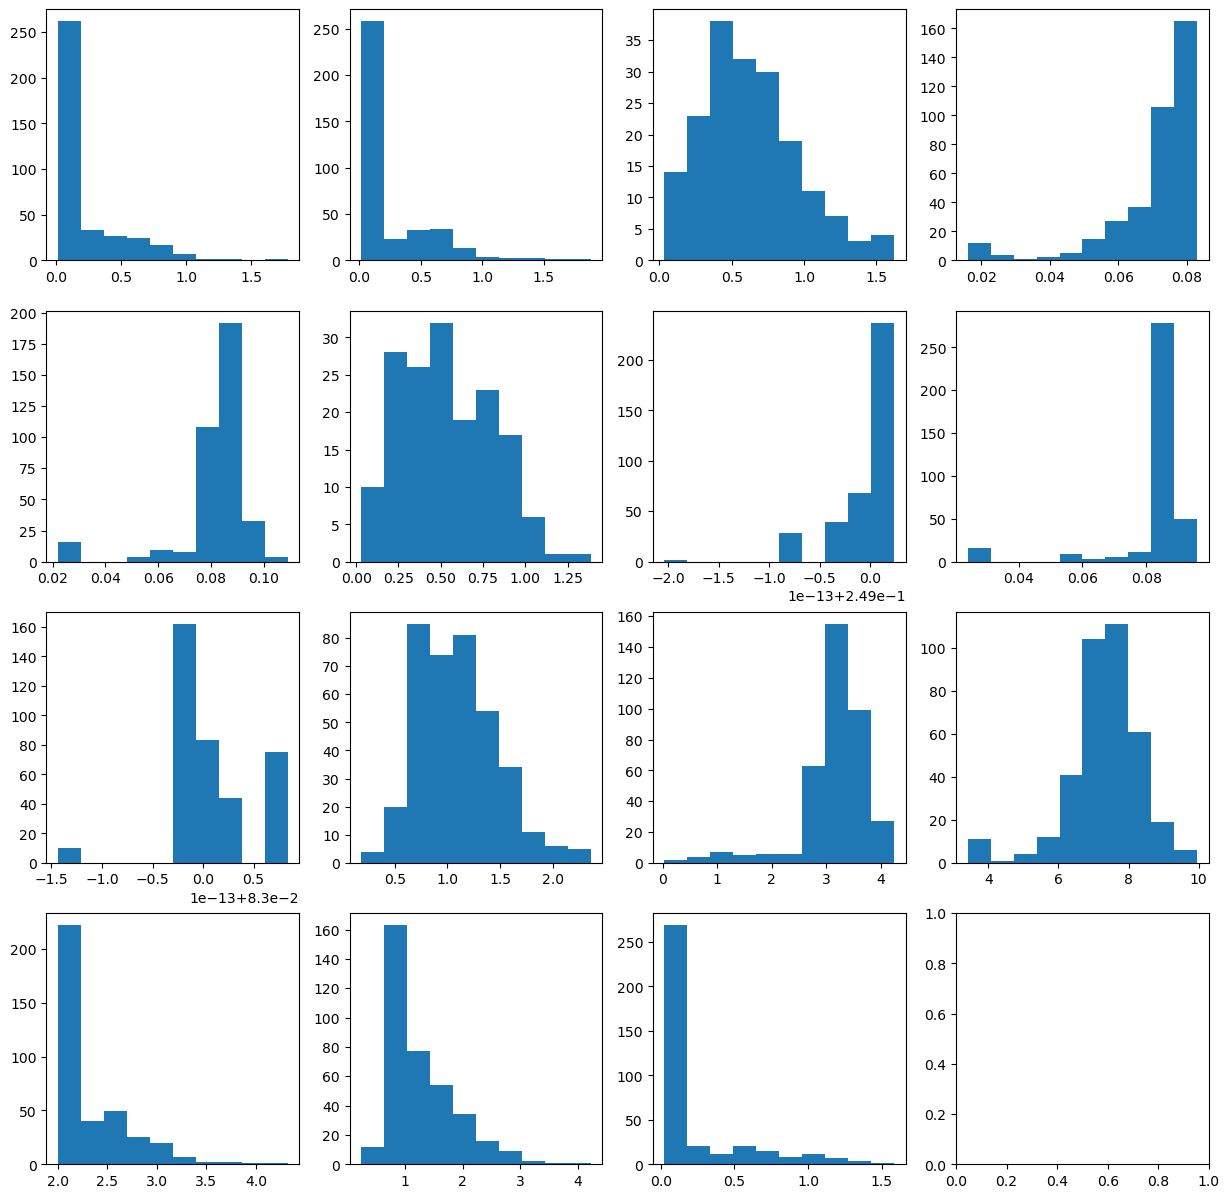

In [69]:
# make histograms
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

frameIDList =  c_event_times.index.get_level_values("EventFrameID_Reference").unique().to_list()
for idx, frameID in enumerate(frameIDList):
    axs.flat[idx].hist(c_event_times[frameID], bins = 10)
    # axs.flat[idx].title.set_text(f"eventID {frameID}, {c_event_times[frameID].count()}")

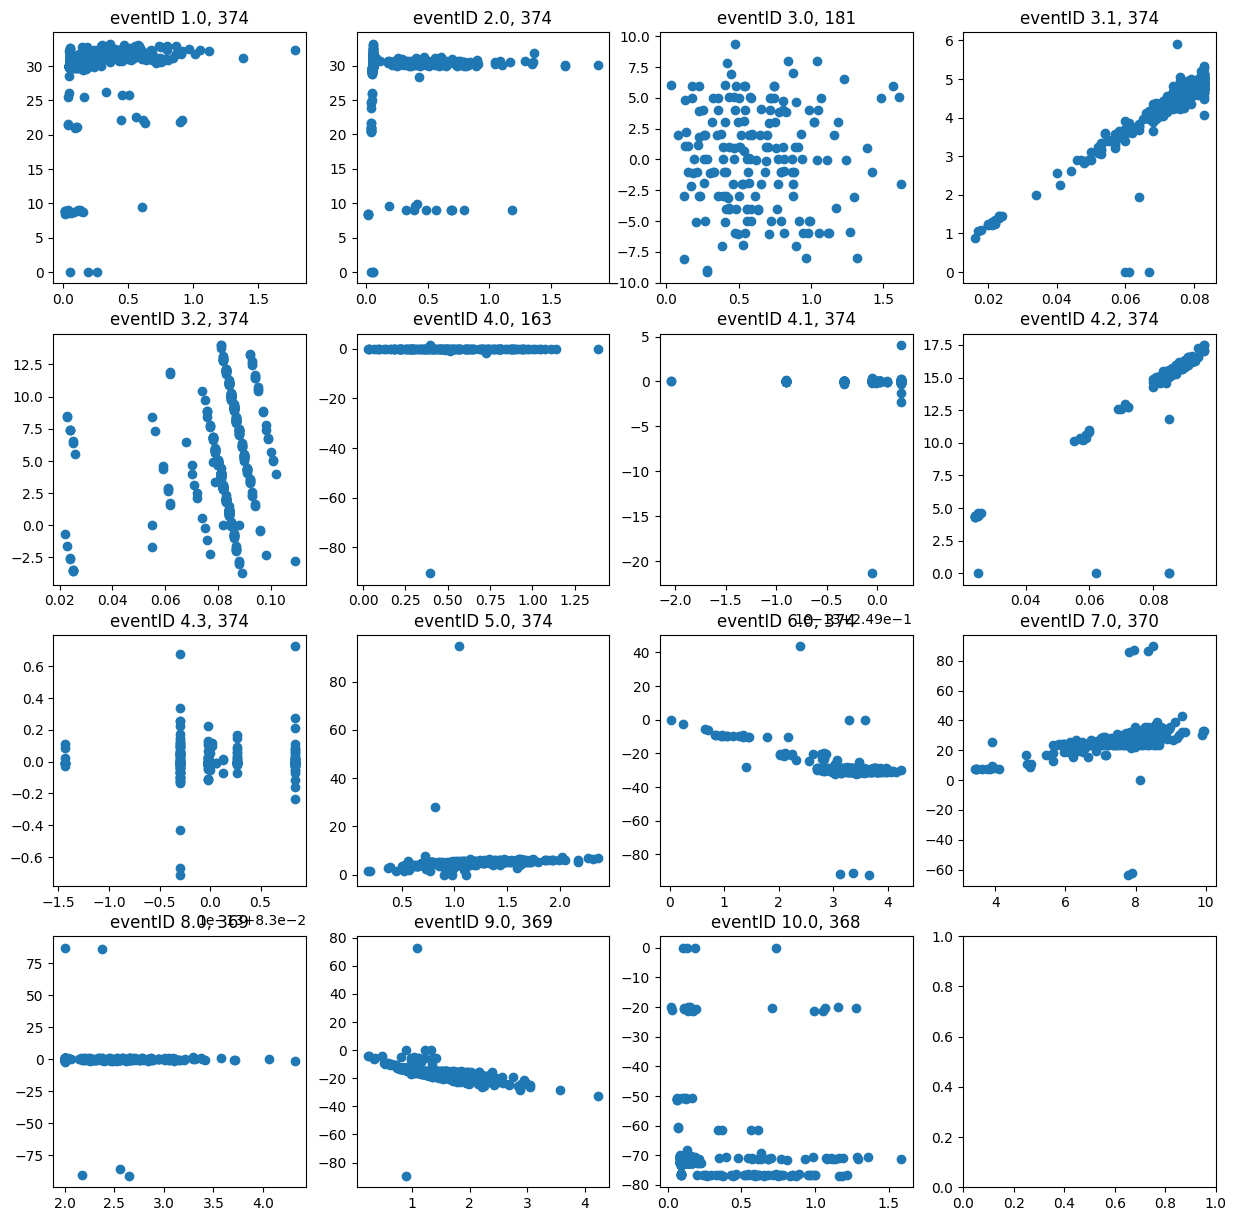

In [46]:

# make scatterplots
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

frameIDList =  c_event_times.index.get_level_values("EventFrameID_Reference").unique().to_list()
for idx, frameID in enumerate(frameIDList):
    axs.flat[idx].scatter(c_event_times[frameID],c_event_leveldiff[frameID])
    axs.flat[idx].title.set_text(f"eventID {frameID}, {c_event_times[frameID].count()}")


## Hvad sker der med Event 3.0 (og Event 4.0)? 

Det er påtvunget ventetid før og efter centrifugering for nogle enkelte batches. Vi kan bruge disse simuleringer til at undersøge delays, når batches produceres back-to-back. For batches uden 3.0/4.0-variation kan vi bare antage, at tiden i dette stadie er 0. 

In [85]:
c_event_times[3.0]

BatchID
5      0.262
8      0.378
9      0.301
15     0.522
23     0.434
       ...  
347    1.318
351    0.496
362    0.770
364    0.151
371    1.056
Name: Time_out, Length: 181, dtype: float64

<Axes: title={'center': 'Batch hvor Event 3.0 tager tid'}>

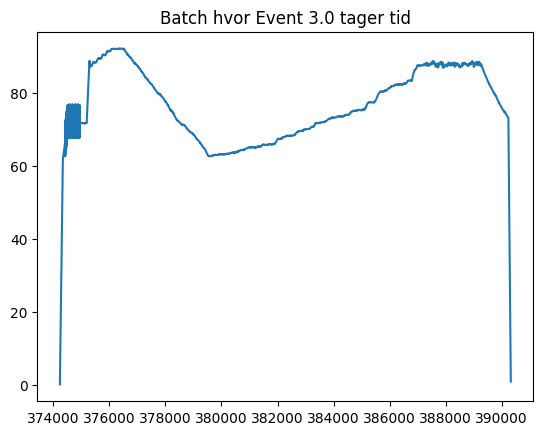

In [119]:
c_production[c_production["BatchID"] == 23]["L1_WithSensorNoise_PV"].plot.line(title='Batch hvor Event 3.0 tager tid')

<Axes: title={'center': 'Batch hvor Event 3.0 tager tid'}>

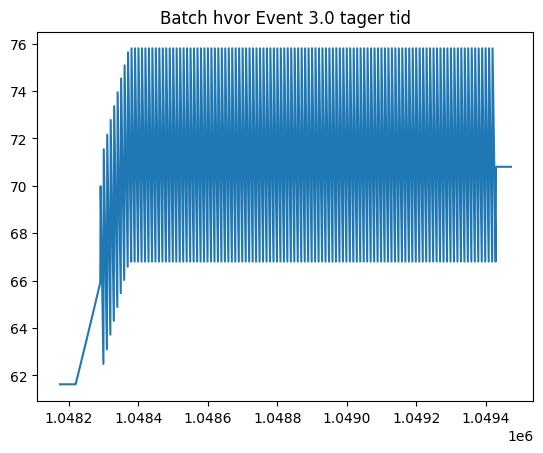

In [141]:
# Og hvad sker der med alt den støj i 3.0? I dunno... Lad os bare antage, at det er ligegyldigt :)
c_production[c_production["BatchID"] == 371]["L1_WithSensorNoise_PV"][500:1800,].plot.line(title='Batch hvor Event 3.0 tager tid')

<Axes: title={'center': 'Batch hvor Event 3.0 ikke sker'}>

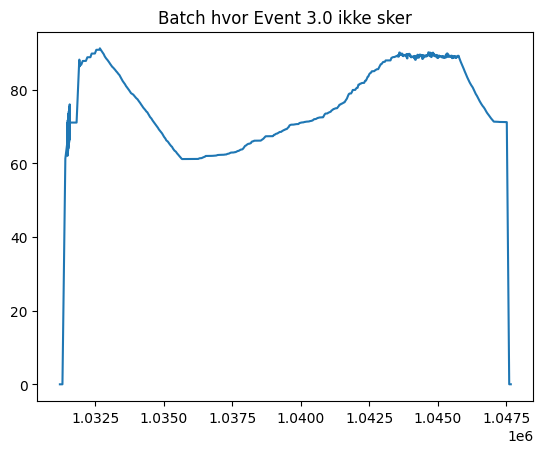

In [142]:
c_production[c_production["BatchID"] == 370]["L1_WithSensorNoise_PV"].plot.line(title='Batch hvor Event 3.0 ikke sker')

## Hvad med at vælge alle de events med "høj" variation? Eksempelvis events, som tager mellem 0.02 til 0.08, kan antages som fixed. 

Følgende events kunne være mere interessante måske. Nogle af dem korrelerer med fyldenivueaet, andre gør slet ikke: 

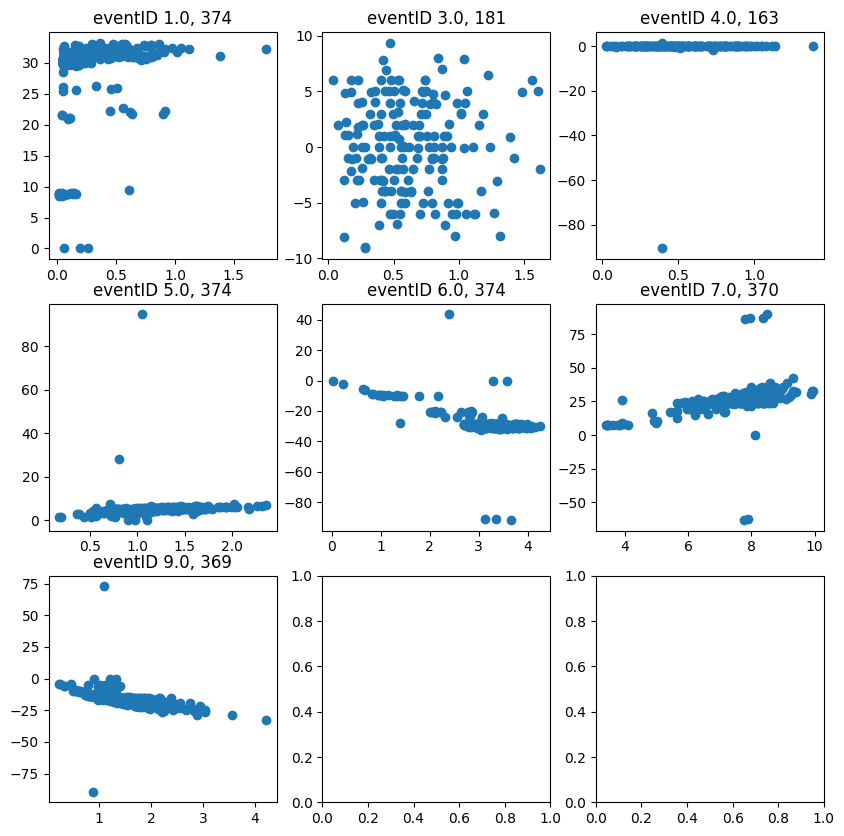

In [152]:
frameIDList_longtime = [1.0,3.0,4.0,5.0,6.0,7.0,9.0]

# make scatterplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for idx, frameID in enumerate(frameIDList_longtime):
    axs.flat[idx].scatter(c_event_times[frameID],c_event_leveldiff[frameID])
    axs.flat[idx].title.set_text(f"eventID {frameID}, {c_event_times[frameID].count()}")


### Event time correlations 

In [245]:
# fill out with NAs 
c_event_times_filled = c_event_times.copy()

# take index from Event 1.0
full_index = c_event_times_filled[1.0].index 

# re-index the others 
c_event_times_filled = c_event_times_filled.reindex(pd.MultiIndex.from_product([frameIDList_longtime, full_index.to_list()], 
                                                                               names=['EventFrameID_Reference', 'BatchID']))

In [268]:
corr_mat = np.zeros((frameIDList_longtime.size,frameIDList_longtime.size))
for idx1, frameID1 in enumerate(frameIDList_longtime):
    for idx2, frameID2 in enumerate(frameIDList_longtime):
        corr_mat[idx1,idx2] = np.ma.corrcoef(np.ma.masked_invalid(c_event_times_filled[frameID1].values),
                                             np.ma.masked_invalid(c_event_times_filled[frameID2].values),
                                             rowvar=True)[0,1]

[1. 3. 4. 5. 6. 7. 9.]


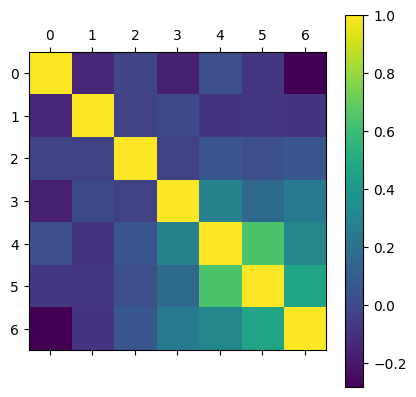

In [275]:
plt.matshow(corr_mat)
plt.colorbar();
print(frameIDList_longtime)

### Filling level correlations 

In [277]:
# fill out with NAs 
c_event_leveldiff_filled = c_event_leveldiff.copy()

# take index from Event 1.0
full_index = c_event_leveldiff_filled[1.0].index 

# re-index the others 
c_event_leveldiff_filled = c_event_leveldiff_filled.reindex(pd.MultiIndex.from_product([frameIDList_longtime, full_index.to_list()], 
                                                                                        names=['EventFrameID_Reference', 'BatchID']))

In [278]:
corr_mat = np.zeros((frameIDList_longtime.size,frameIDList_longtime.size))
for idx1, frameID1 in enumerate(frameIDList_longtime):
    for idx2, frameID2 in enumerate(frameIDList_longtime):
        corr_mat[idx1,idx2] = np.ma.corrcoef(np.ma.masked_invalid(c_event_leveldiff_filled[frameID1].values),
                                             np.ma.masked_invalid(c_event_leveldiff_filled[frameID2].values),
                                             rowvar=True)[0,1]

[1. 3. 4. 5. 6. 7. 9.]


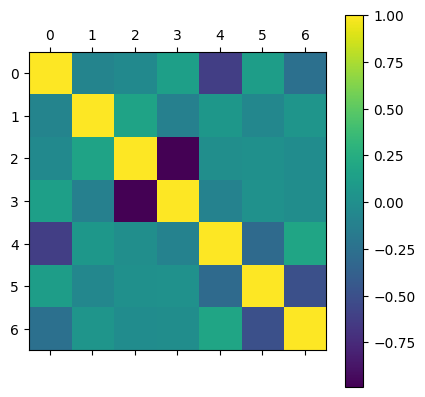

In [279]:
plt.matshow(corr_mat)
plt.colorbar();
print(frameIDList_longtime)

In [56]:
# correlation
# fig, axs = plt.subplots(4, 4, figsize=(15, 15))

frameIDList =  np.array(c_event_times.index.get_level_values("EventFrameID_Reference").unique().to_list())
frame_length = np.array([c_event_times[frameID].__len__() for frameID in frameIDList])

# Only loop over those with observations each time

corr_mat = np.zeros(((frame_length == np.max(frame_length)).sum(),(frame_length == np.max(frame_length)).sum()))
for idx1, frameID1 in enumerate(frameIDList[frame_length == np.max(frame_length)]):
    for idx2, frameID2 in enumerate(frameIDList[frame_length == np.max(frame_length)]):
        corr_mat[idx1,idx2] = np.corrcoef(c_event_times[frameID1].values,c_event_times[frameID2].values)[0,1]
    # axs.flat[idx].hist(c_event_times[frameID], bins = 50)
    # axs.flat[idx].title.set_text(f"eventID {frameID}, {c_event_times[frameID].count()}")

[1.  2.  3.1 3.2 4.1 4.2 4.3 5.  6. ]


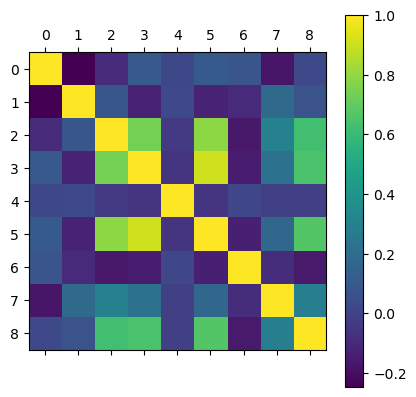

In [64]:
plt.matshow(corr_mat)
plt.colorbar();
print(frameIDList[frame_length == np.max(frame_length)])

- Der er nogle hvor der er markant færre observationer (altså batches, hvor processen ikke gennemgår et stadie (3.0 og 4.0 især))

- Undersøg sammenhæng mellem minus batchID og processen
- Fit histogrammer (1.0, 2.0, 3.0, måske også 3.1 og 3.2)
- sammenhæng i histogrammer og om det er negative farver (hypotese: noget der er blevet pillet ved)